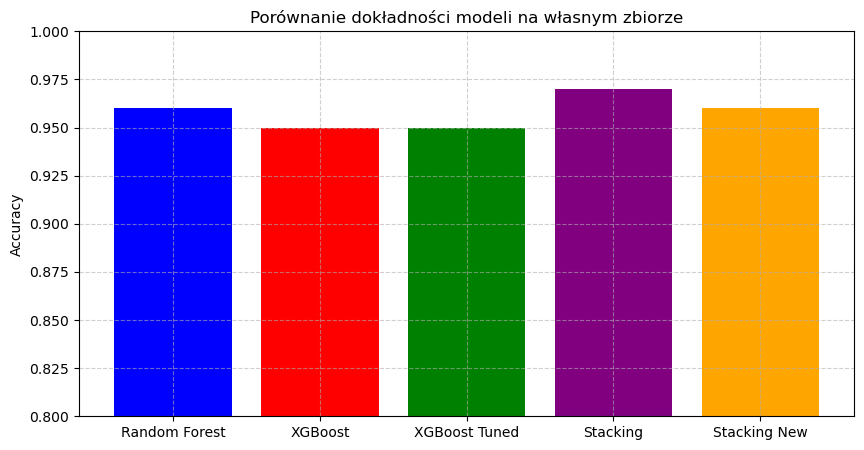

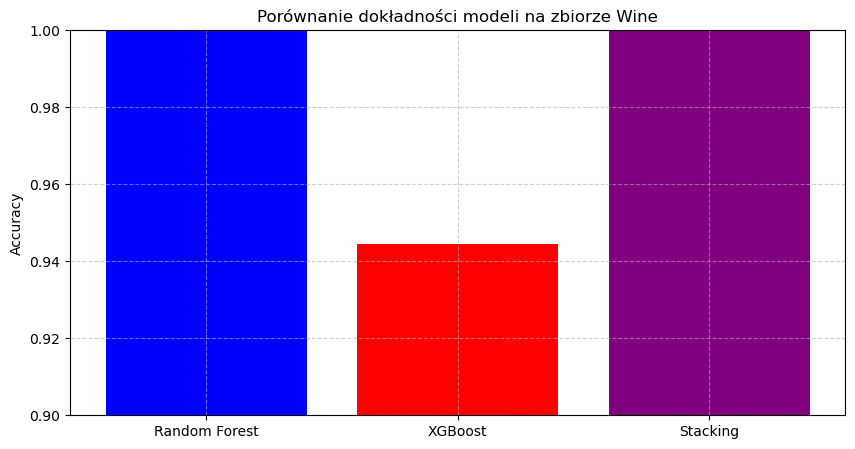

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Ustawienie ziarna losowego dla powtarzalności
np.random.seed(42)

# Generowanie nowego zbioru danych
X = np.random.randn(500, 2) * [3, 1]
y = (X[:, 0] > X[:, 1]).astype(int)

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Porównanie dokładności modeli: Random Forest, XGBoost i Stacking

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

# Stacking z dodatkowymi modelami
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True))
]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)
acc_stack = accuracy_score(y_test, y_pred_stack)

# 2. Przeprowadzenie tuningu hiperparametrów dla modelu XGBoost

xgb_tuned = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, eval_metric='logloss')
xgb_tuned.fit(X_train, y_train)
y_pred_xgb_tuned = xgb_tuned.predict(X_test)
xgb_tuned_acc = accuracy_score(y_test, y_pred_xgb_tuned)

# 3. Wprowadzenie nowego modelu do stacking (np. KNN lub DecisionTreeClassifier)

# Dodanie KNN oraz DecisionTreeClassifier do stacking
estimators_new = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('dt', DecisionTreeClassifier(random_state=42))
]
stack_new = StackingClassifier(estimators=estimators_new, final_estimator=LogisticRegression())
stack_new.fit(X_train, y_train)
y_pred_stack_new = stack_new.predict(X_test)
stack_new_acc = accuracy_score(y_test, y_pred_stack_new)

# 4. Przetestowanie modeli na innym zbiorze danych (Wine)
from sklearn.datasets import load_wine
X_wine, y_wine = load_wine(return_X_y=True)
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

# Testowanie modelu Random Forest na zbiorze Wine
rf.fit(X_train_wine, y_train_wine)
y_pred_rf_wine = rf.predict(X_test_wine)
rf_acc_wine = accuracy_score(y_test_wine, y_pred_rf_wine)

# Testowanie modelu XGBoost na zbiorze Wine
xgb.fit(X_train_wine, y_train_wine)
y_pred_xgb_wine = xgb.predict(X_test_wine)
xgb_acc_wine = accuracy_score(y_test_wine, y_pred_xgb_wine)

# Testowanie modelu Stacking na zbiorze Wine
stack.fit(X_train_wine, y_train_wine)
y_pred_stack_wine = stack.predict(X_test_wine)
stack_acc_wine = accuracy_score(y_test_wine, y_pred_stack_wine)

# 5. Przedstawienie wyników w formie wykresu słupkowego porównującego dokładność

# Wyniki na własnym zbiorze danych
models = ['Random Forest', 'XGBoost', 'XGBoost Tuned', 'Stacking', 'Stacking New']
accuracies = [acc_rf, acc_xgb, xgb_tuned_acc, acc_stack, stack_new_acc]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'red', 'green', 'purple', 'orange'])
plt.ylabel('Accuracy')
plt.title('Porównanie dokładności modeli na własnym zbiorze')
plt.ylim(0.8, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Wyniki na zbiorze Wine
models_wine = ['Random Forest', 'XGBoost', 'Stacking']
accuracies_wine = [rf_acc_wine, xgb_acc_wine, stack_acc_wine]

plt.figure(figsize=(10, 5))
plt.bar(models_wine, accuracies_wine, color=['blue', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.title('Porównanie dokładności modeli na zbiorze Wine')
plt.ylim(0.9, 1.0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
